***Bernstein-Vazirani Algorithm***

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
%matplotlib inline

In [10]:
secretnumber = '1001'

In [11]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))
circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

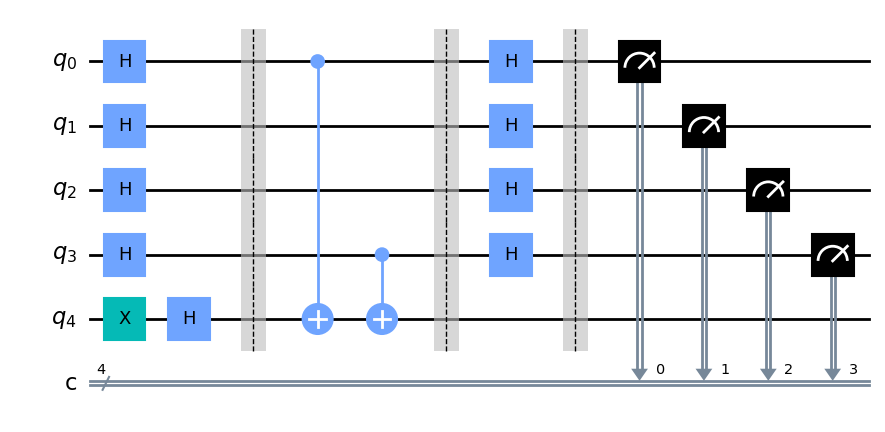

In [12]:
circuit.draw()

In [13]:
simulator = AerSimulator()
job = simulator.run(circuit, shots=1)      # run the experiment
result = job.result()
counts = result.get_counts()
print(counts)

{'1001': 1}


***Running the circuit on real quantum computer***

In [14]:
from qiskit.providers.ibmq import IBMQ, least_busy


In [15]:
#IBMQ.load_account() #running it one time is enough, subsequent runs of the circuit does not need to load the account again

ibmqfactory.load_account:WARNING:2022-10-25 09:56:57,524: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

Running on ibmq_quito


In [17]:
from qiskit import transpile
transpiled_qc = transpile(circuit, device)

In [18]:
from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)


Job Status: job has successfully run


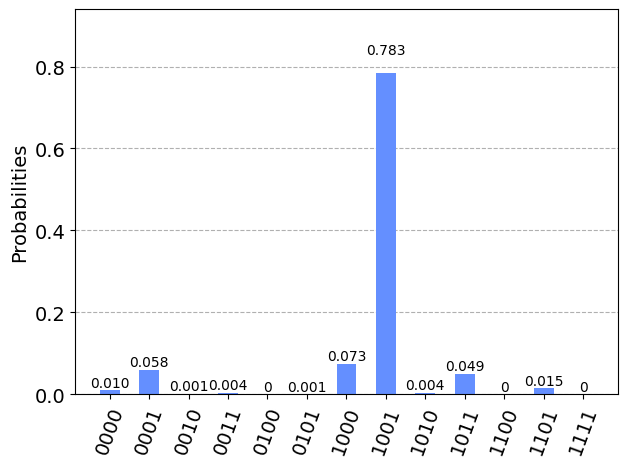

In [19]:
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())